In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data loading

In [115]:
 df = pd.read_csv(r'C:\Users\KIIT\OneDrive\Desktop\vs codeings\.vscode\amazon\Amazon_Sale_Report.csv')
    
df
    

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [116]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# data cleaning

In [117]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [118]:
unique_values = {col: df[col].unique() for col in df.columns}

unique_values_df = pd.DataFrame(dict([(k, pd.Series(v).replace(np.nan, 'null')) for k, v in unique_values.items()]))
unique_values_df.head(8)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,null,null
1,1,171-9198151-1101146,04-29-22,Shipped - Delivered to Buyer,Amazon,Non-Amazon,Expedited,Shirt,3XL,Shipped,...,null,406.0,BENGALURU,KARNATAKA,560085.0,null,True,null,NaN,NaN
2,2,404-0687676-7273146,04-28-22,Shipped,NaN,NaN,NaN,Blazzer,XL,Cancelled,...,NaN,329.0,NAVI MUMBAI,PUDUCHERRY,410210.0,NaN,NaN,NaN,NaN,NaN
3,3,403-9615377-8133951,04-27-22,Shipped - Returned to Seller,NaN,NaN,NaN,Trousers,L,Unshipped,...,NaN,753.33,PUDUCHERRY,TAMIL NADU,605008.0,NaN,NaN,NaN,NaN,NaN
4,4,407-1069790-7240320,04-26-22,Shipped - Rejected by Buyer,NaN,NaN,NaN,Perfume,XXL,NaN,...,NaN,574.0,CHENNAI,UTTAR PRADESH,600073.0,NaN,NaN,NaN,NaN,NaN
5,5,404-1490984-4578765,04-25-22,Shipped - Lost in Transit,NaN,NaN,NaN,Socks,XS,NaN,...,NaN,824.0,GHAZIABAD,CHANDIGARH,201102.0,NaN,NaN,NaN,NaN,NaN
6,6,408-5748499-6859555,04-24-22,Shipped - Out for Delivery,NaN,NaN,NaN,Shoes,6XL,NaN,...,NaN,653.0,CHANDIGARH,TELANGANA,160036.0,NaN,NaN,NaN,NaN,NaN
7,7,406-7807733-3785945,04-23-22,Shipped - Returning to Seller,NaN,NaN,NaN,Wallet,M,NaN,...,NaN,399.0,HYDERABAD,ANDHRA PRADESH,500032.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(['New', 'PendingS'], axis=1, inplace=True)
df.drop(['index','currency','ship-country','Sales Channel'], axis=1, inplace=True)
df.drop('ship-postal-code', axis=1, inplace=True)
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,False,NaN


In [119]:
df.drop('fulfilled-by', axis=1, inplace=True)

df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['ship-city'].fillna(df['ship-city'].mode()[0], inplace=True)
df['ship-state'].fillna(df['ship-state'].mode()[0], inplace=True)
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                     0
ship-city                  0
ship-state                 0
ship-postal-code          35
ship-country              35
B2B                        0
New                   128976
PendingS              128976
dtype: int64

In [64]:
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df.describe()


,Qty,Amount
count,128976.000000,128976.000000
mean,0.904401,645.927694
std,0.313368,272.747592
min,0.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,605.000000
75%,1.000000,771.000000
max,15.000000,5584.000000


In [65]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

df['Revenue'] = df['Qty']*df['Amount']

df.head()



,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Day,Month,Revenue
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,30,4,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,30,4,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN,30,4,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,30,4,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,30,4,574.0


In [168]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#create three different aggregation options: monthly, quarterly, and yearly.

# Monthly sales revenue
df['Month'] = df['Date'].dt.to_period('M')  # Creates a month period (YYYY-MM)
monthly_sales = df.groupby('Month')['Amount'].sum()

# Quarterly sales revenue
df['Quarter'] = df['Date'].dt.to_period('Q')  # Creates a quarter period (YYYY-Qx)
quarterly_sales = df.groupby('Quarter')['Amount'].sum()

# Yearly sales revenue
df['Year'] = df['Date'].dt.to_period('Y')  # Creates a year period (YYYY)
yearly_sales = df.groupby('Year')['Amount'].sum()

# Optional: Check the first few rows of monthly sales to ensure it's correct
print(monthly_sales.head())


Month
2022-03      107128.85
2022-04    30653620.27
2022-05    27741396.75
2022-06    24807024.38
Freq: M, Name: Amount, dtype: float64


# VISVALIZATION

# SALES OVERVIEW

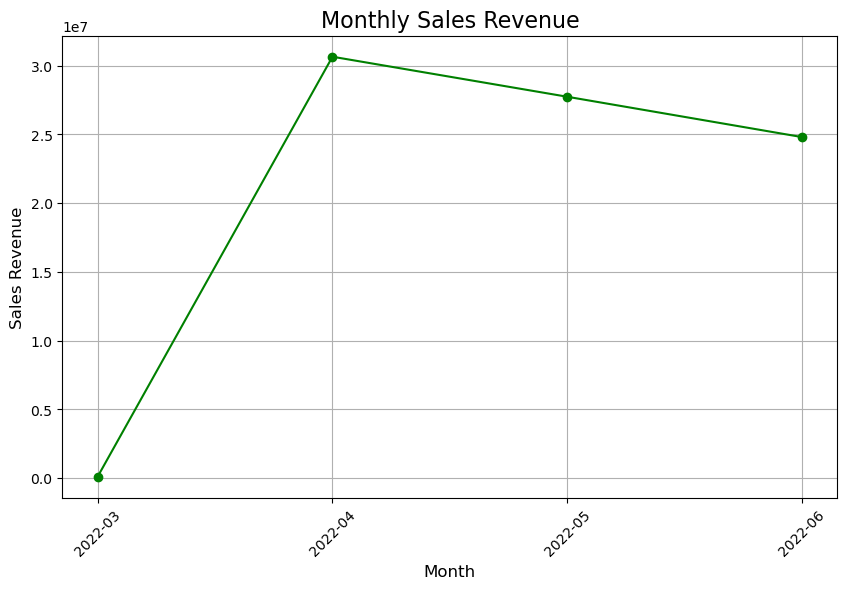

In [201]:
import matplotlib.pyplot as plt

# Plot monthly sales revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', color='g')
plt.title("Monthly Sales Revenue", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


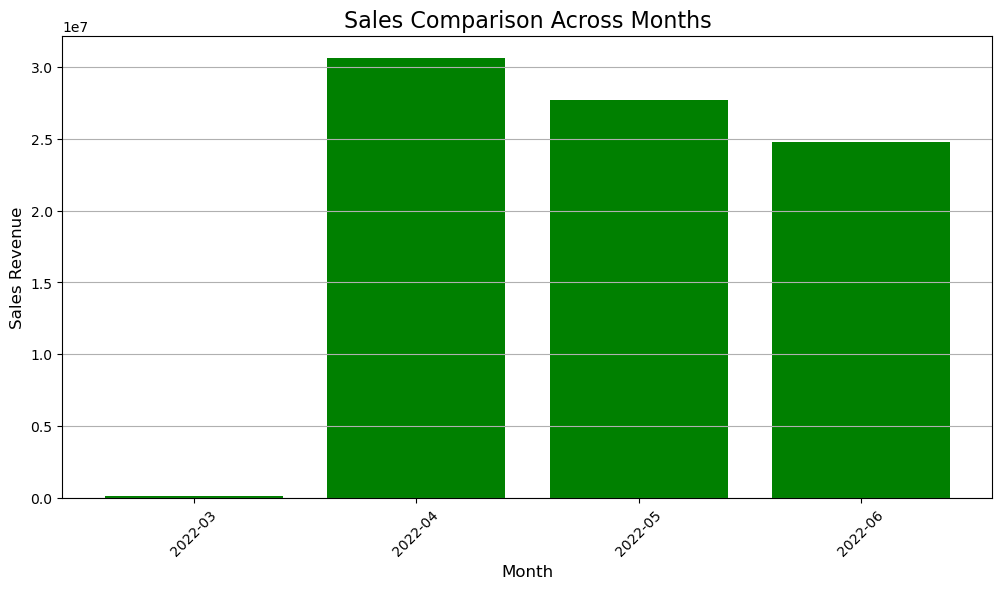

In [202]:
# Aggregate sales by month
df['Month'] = df['Date'].dt.to_period('M')  # Creates a month period (YYYY-MM)
monthly_sales = df.groupby('Month')['Amount'].sum()

# Plot bar chart for monthly sales comparison
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales.index.astype(str), monthly_sales.values, color='g')
plt.title("Sales Comparison Across Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


# heat map of orders per week in each mounth

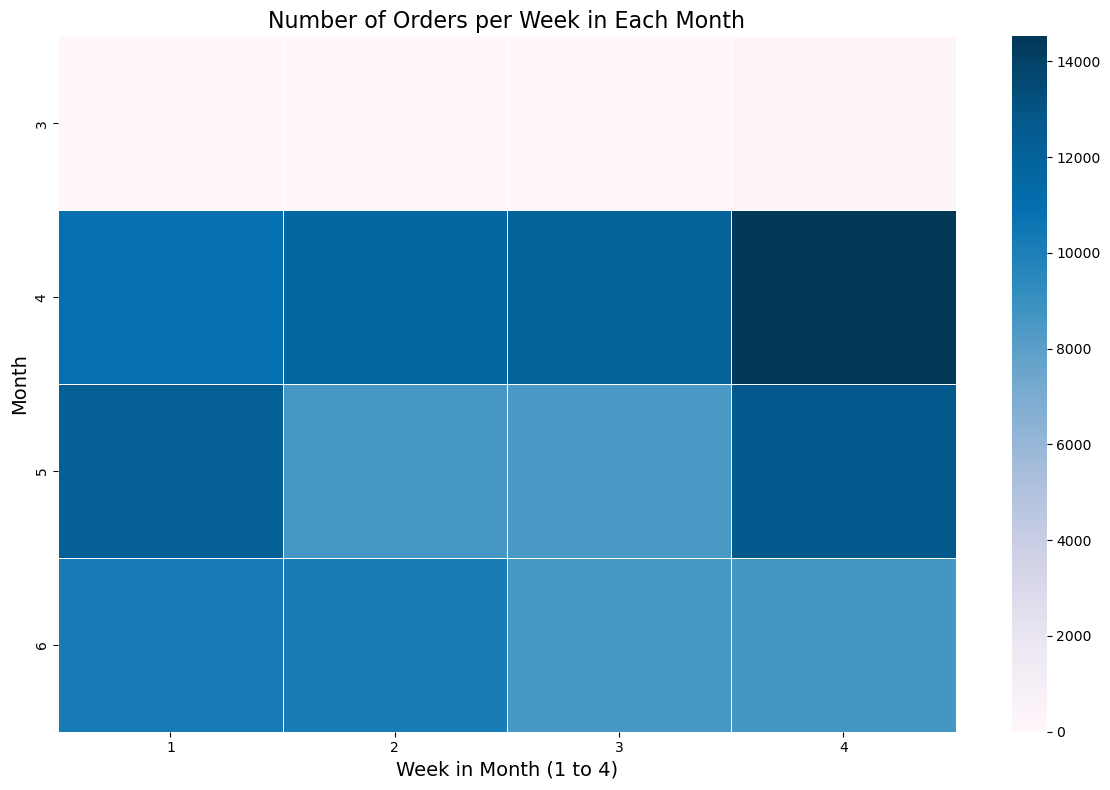

In [66]:
df['Week in Month'] = np.where((df['Date'].dt.day - 1) // 7 + 1 > 4, 4, (df['Date'].dt.day - 1) // 7 + 1)


orders_per_week_month = df.groupby(['Month', 'Week in Month']).size().reset_index(name='Order Count')

pivot_table = orders_per_week_month.pivot_table(index='Month', columns='Week in Month', values='Order Count').fillna(0)


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, cmap="PuBu", cbar=True, linewidths=0.5)
plt.title('Number of Orders per Week in Each Month', fontsize=16)
plt.xlabel('Week in Month (1 to 4)', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.tight_layout()
plt.show()



# order status by percentage

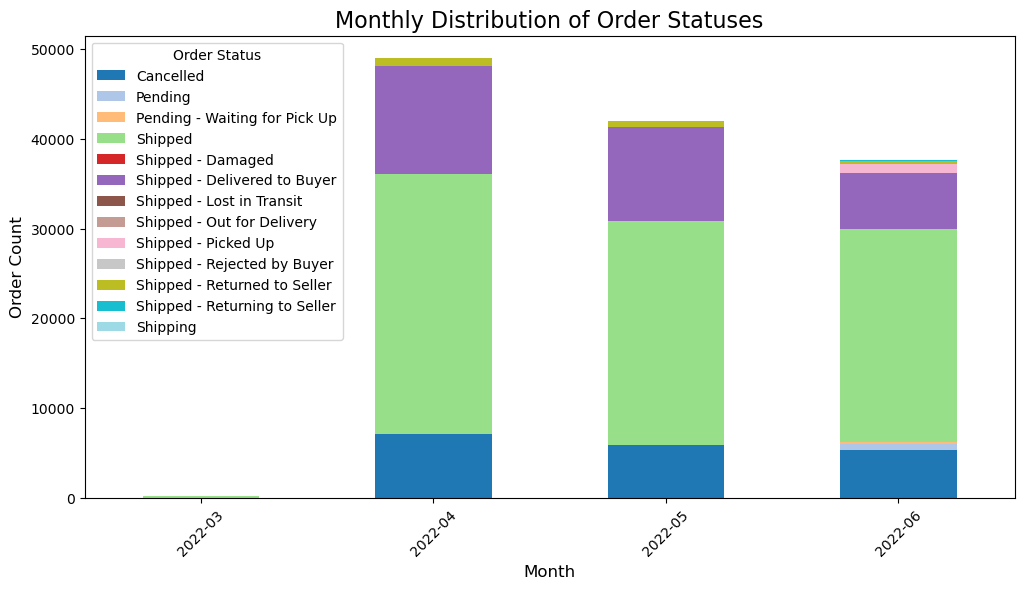

In [175]:
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.to_period('M')

# Group by month and order status
monthly_status_distribution = df.groupby(['Month', 'Status']).size().unstack(fill_value=0)

# Plot the stacked bar chart
monthly_status_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title("Monthly Distribution of Order Statuses", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Order Status")
plt.show()


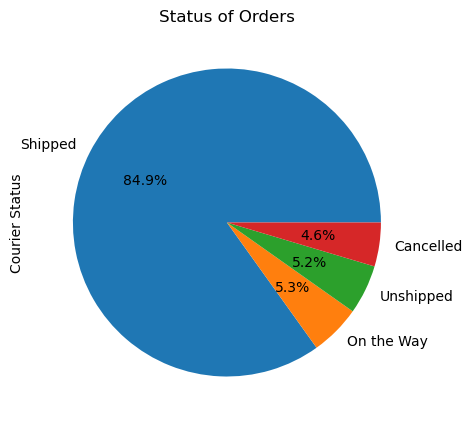

In [67]:

plt.figure(figsize=(10,5))
df['Courier Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Status of Orders')
plt.show()


# fulfilled by!

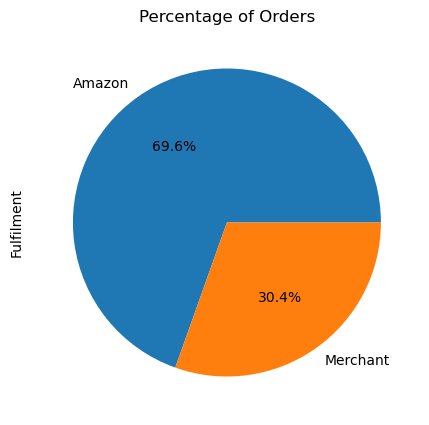

In [16]:
plt.figure(figsize=(10,5))
df['Fulfilment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Orders')
plt.show()

# courier status and fulfillment

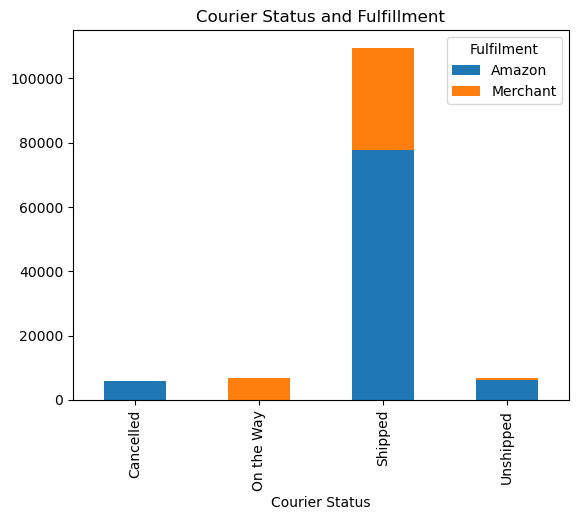

In [68]:
# plt.figure(figsize=(10,5))
df.groupby(['Courier Status','Fulfilment']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Courier Status and Fulfillment')
plt.show()

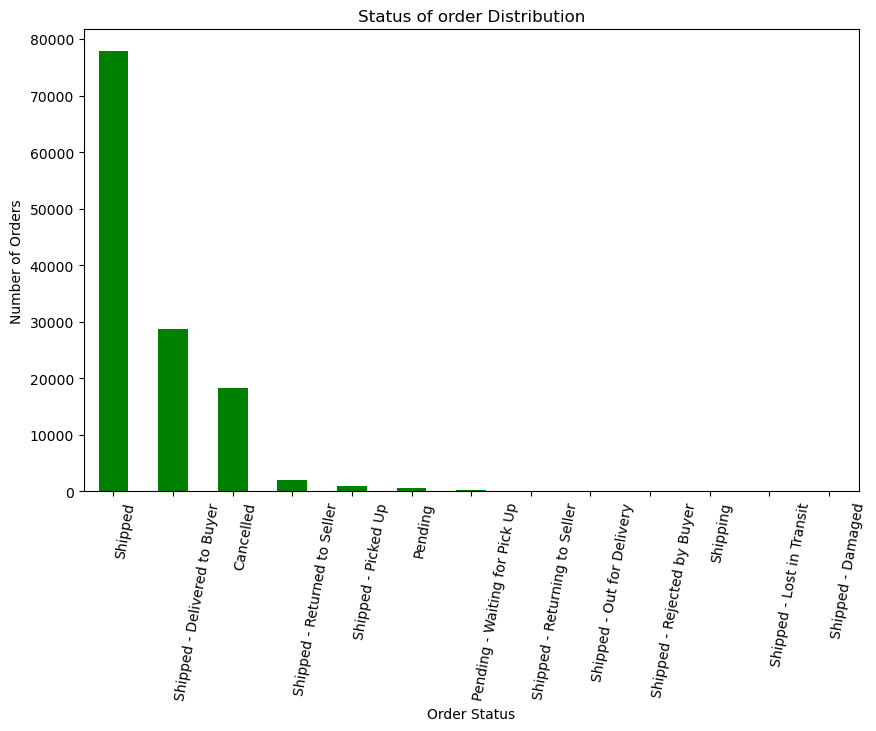

In [197]:
plt.figure(figsize=(10, 6))
df['Status'].value_counts().plot(kind='bar', color='green')
plt.title('Status of order Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=80, ha="left")
plt.show()

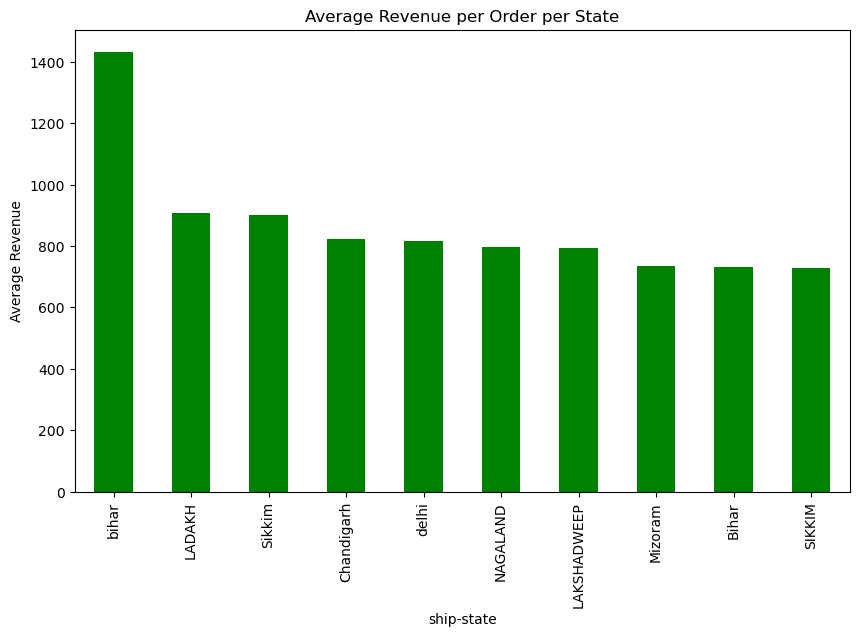

In [177]:

average_revenue_per_order = df.groupby('ship-state')['Amount'].mean().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))

average_revenue_per_order.plot(kind='bar', color='green')
plt.title('Average Revenue per Order per State')
plt.ylabel('Average Revenue')
plt.show()


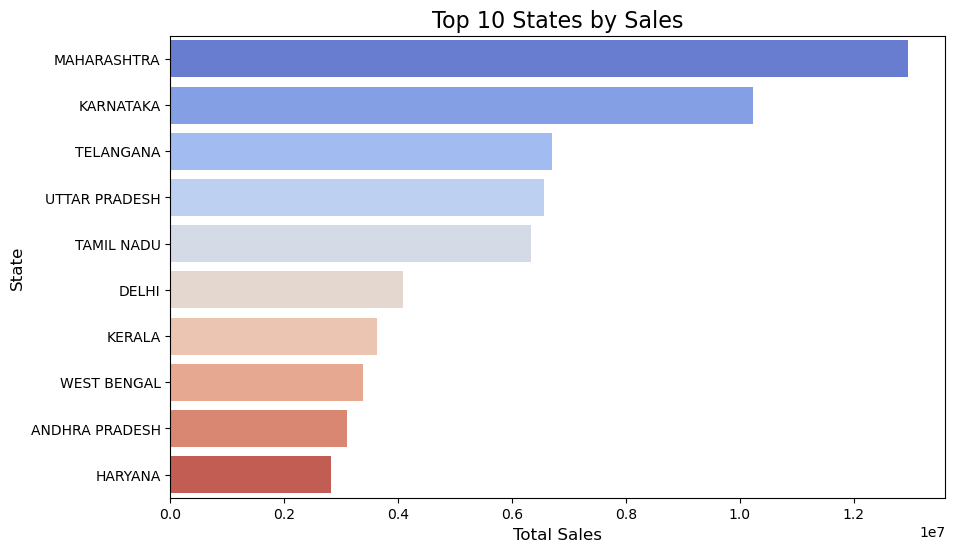

In [48]:

state_sales = df.groupby('ship-state')['total_sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='total_sales', ascending=False)


city_sales = df.groupby('ship-city')['total_sales'].sum().reset_index()
city_sales = city_sales.sort_values(by='total_sales', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=state_sales.head(10), x='total_sales', y='ship-state', palette='coolwarm')
plt.title('Top 10 States by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()


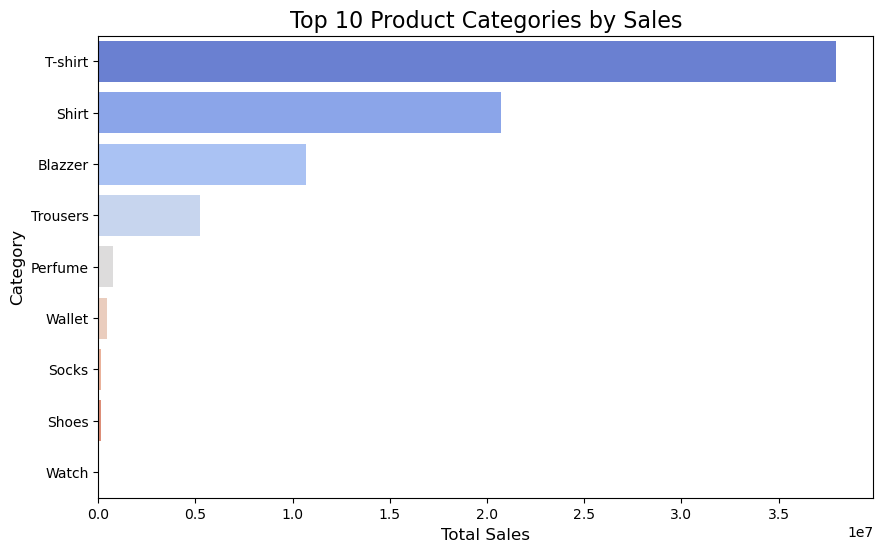

In [39]:
if 'total_sales' not in df.columns:
    df['total_sales'] = df['Amount'] * df['Qty']
category_analysis = df.groupby('Category')[['total_sales', 'Qty']].sum().reset_index()
category_analysis = category_analysis.sort_values(by='total_sales', ascending=False)


size_analysis = df.groupby('Size')['Qty'].sum().reset_index()
size_analysis = size_analysis.sort_values(by='Qty', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=category_analysis.head(10), x='total_sales', y='Category', palette='coolwarm')
plt.title('Top 10 Product Categories by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()




# plot for avg and count of orders over a mounth

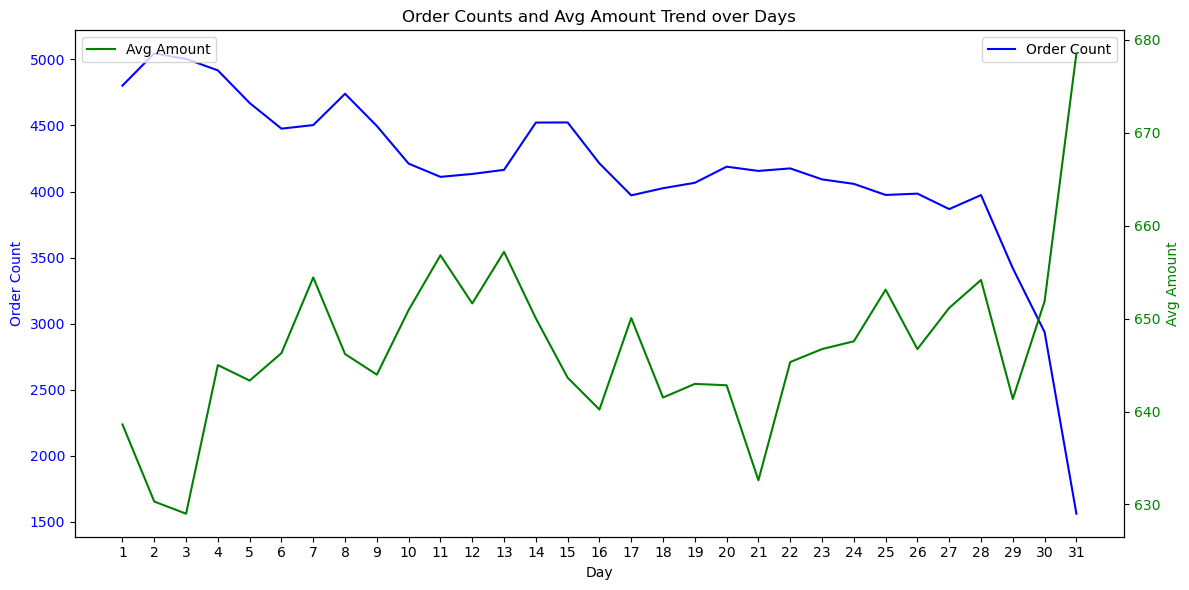

In [18]:
sales_trend_df = df.groupby('Day').agg({'Order ID': 'count', 'Amount': 'mean'}).reset_index()
sales_trend_df.columns = ['Day', 'Order Count', 'Avg Amount']


fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='Day', y='Order Count', data=sales_trend_df, ax=ax1, color='blue', label='Order Count')
ax1.set_xlabel('Day')
ax1.set_ylabel('Order Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
sns.lineplot(x='Day', y='Avg Amount', data=sales_trend_df, ax=ax2, color='green', label='Avg Amount')
ax2.set_ylabel('Avg Amount', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Order Counts and Avg Amount Trend over Days')
plt.xticks(np.arange(1, 32, 1))
fig.tight_layout()
plt.show()

# Visualizing the shipping method distribution

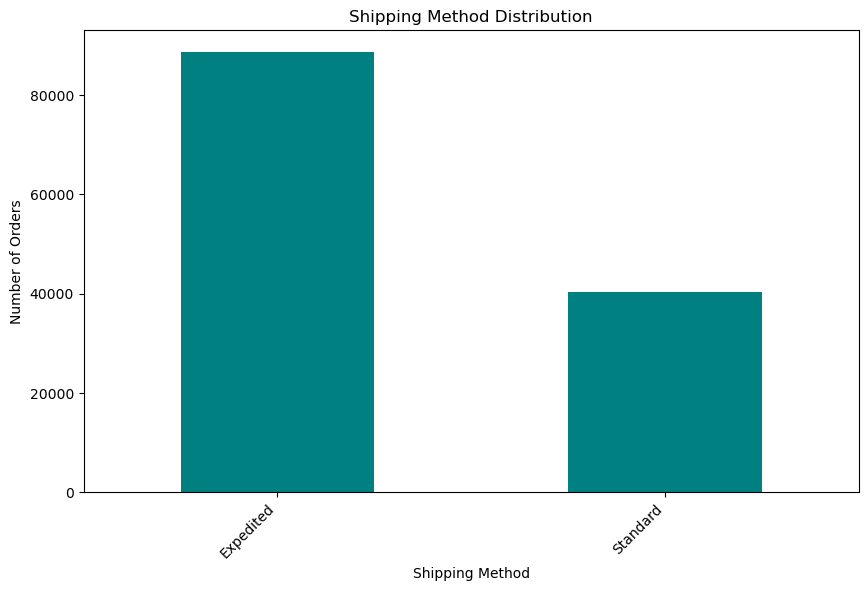

In [21]:
shipping_method_distribution = df['ship-service-level'].value_counts()

plt.figure(figsize=(10, 6))
shipping_method_distribution.plot(kind='bar', color='teal')
plt.title('Shipping Method Distribution')
plt.xlabel('Shipping Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha="right")
plt.show()

# how sales has veried over time

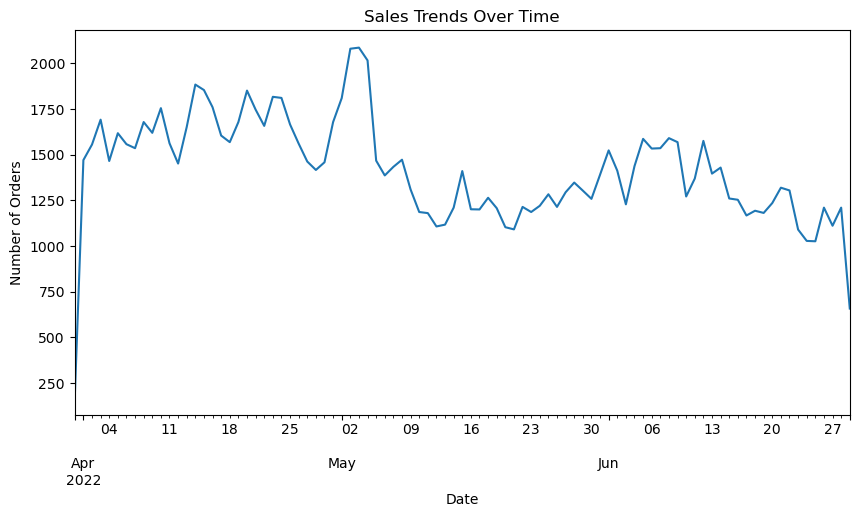

In [22]:
sales_trends = df.groupby('Date').size()
sales_trends.plot(figsize=(10, 5))
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

# PRODUCT ANALYSIS

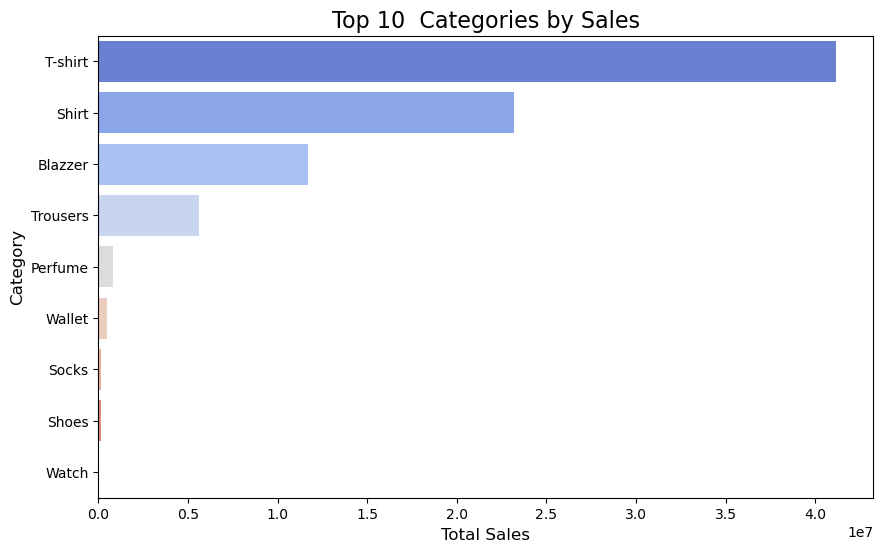

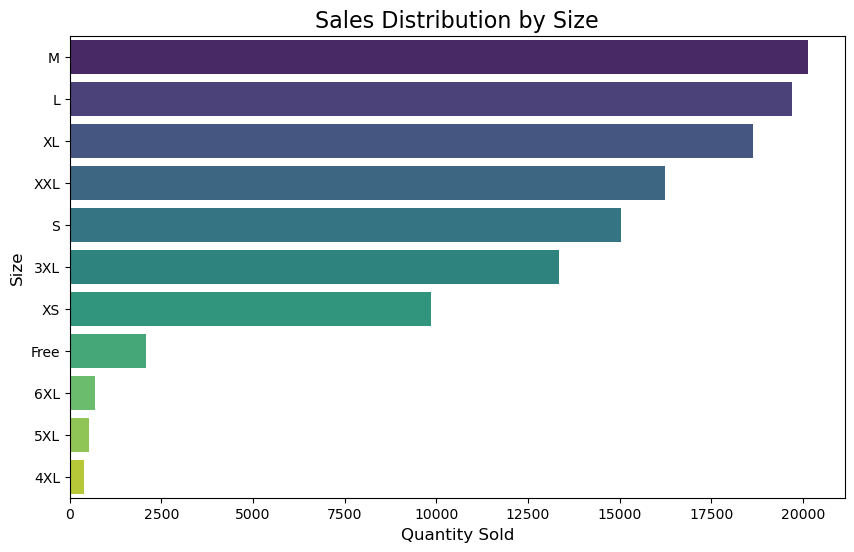

In [23]:

product_category_sales = df.groupby('Category')['Amount'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by='Amount', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=product_category_sales.head(10), x='Amount', y='Category', palette='coolwarm')
plt.title('Top 10  Categories by Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


size_sales = df.groupby('Size')['Qty'].sum().reset_index()
size_sales = size_sales.sort_values(by='Qty', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=size_sales, x='Qty', y='Size', palette='viridis')
plt.title('Sales Distribution by Size', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Size', fontsize=12)
plt.show()


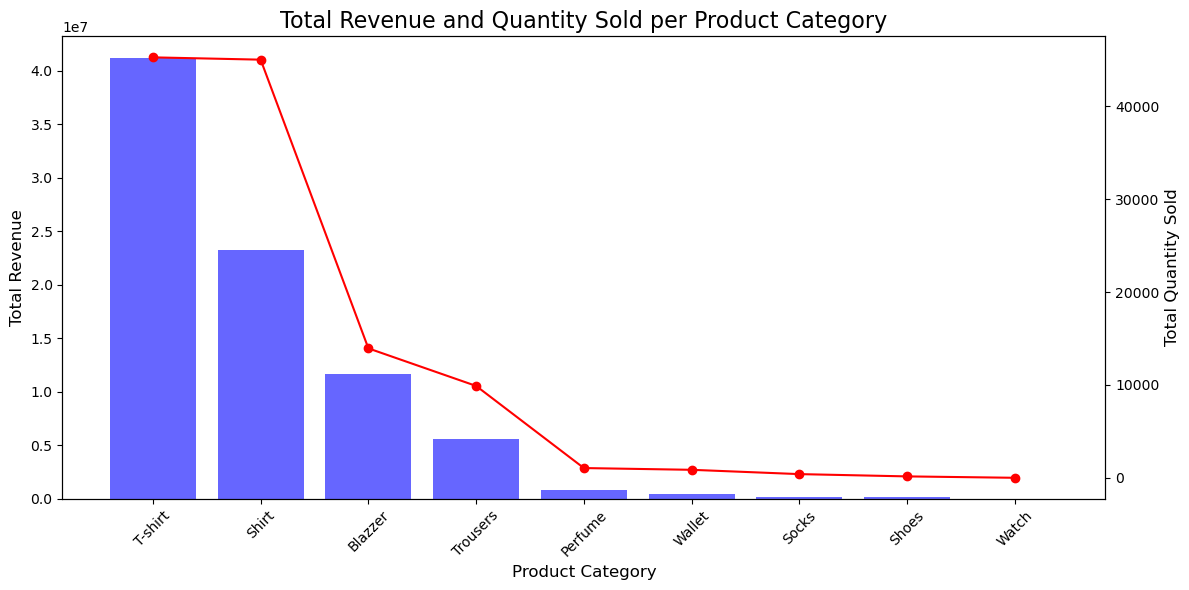

In [178]:
import matplotlib.pyplot as plt

# Aggregate total revenue and quantity sold for each product category
category_performance = df.groupby('Category').agg(
    total_revenue=('Amount', 'sum'),
    total_quantity=('Qty', 'sum')
).sort_values(by='total_revenue', ascending=False)

# Plot the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total revenue
ax1.bar(category_performance.index, category_performance['total_revenue'], color='blue', alpha=0.6, label='Total Revenue')
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Total Revenue', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Line chart for total quantity sold on the same axis
ax2 = ax1.twinx()
ax2.plot(category_performance.index, category_performance['total_quantity'], color='red', marker='o', label='Total Quantity Sold')
ax2.set_ylabel('Total Quantity Sold', fontsize=12)

# Add title and show plot
plt.title('Total Revenue and Quantity Sold per Product Category', fontsize=16)
fig.tight_layout()
plt.show()


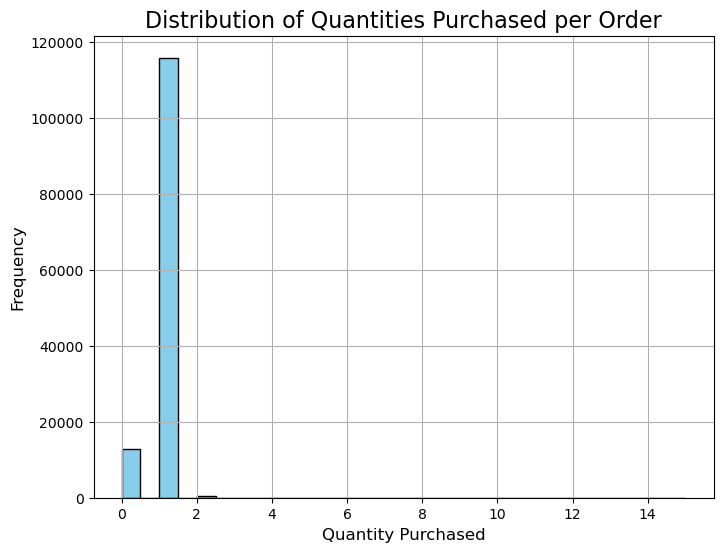

In [179]:
# Plotting the histogram for quantity distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Qty'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantities Purchased per Order', fontsize=16)
plt.xlabel('Quantity Purchased', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


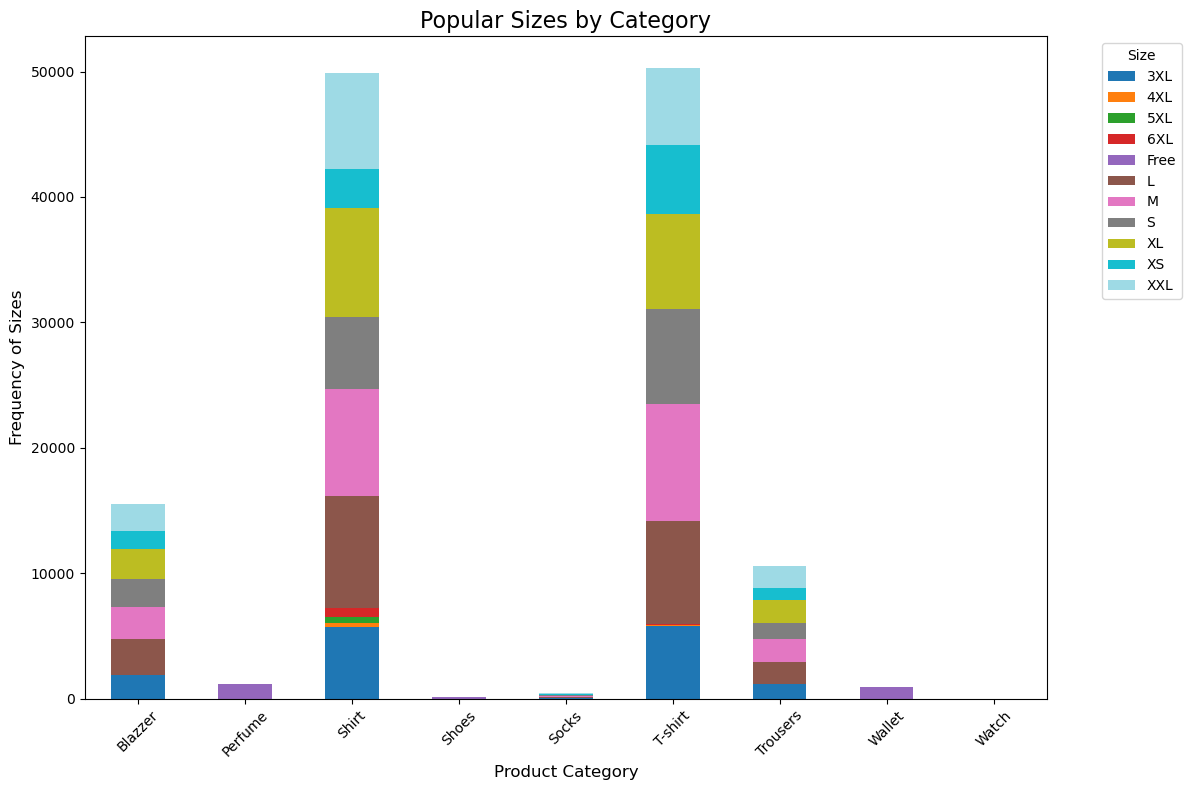

In [181]:
# Aggregating the data by 'Category' and 'Size' to get the frequency of each size in each category
size_by_category = df.groupby(['Category', 'Size']).size().unstack().fillna(0)

# Plotting a bar chart for each category
size_by_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Popular Sizes by Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Frequency of Sizes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


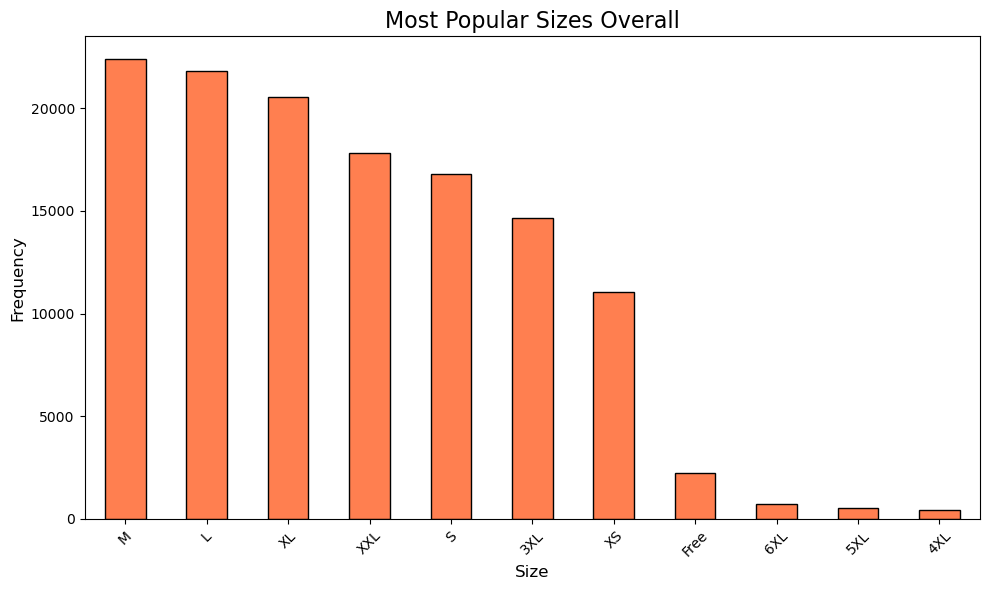

In [182]:
# Aggregating the data to get the frequency of each size across all categories
size_overall = df['Size'].value_counts()

# Plotting the bar chart for overall size popularity
plt.figure(figsize=(10, 6))
size_overall.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Most Popular Sizes Overall', fontsize=16)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


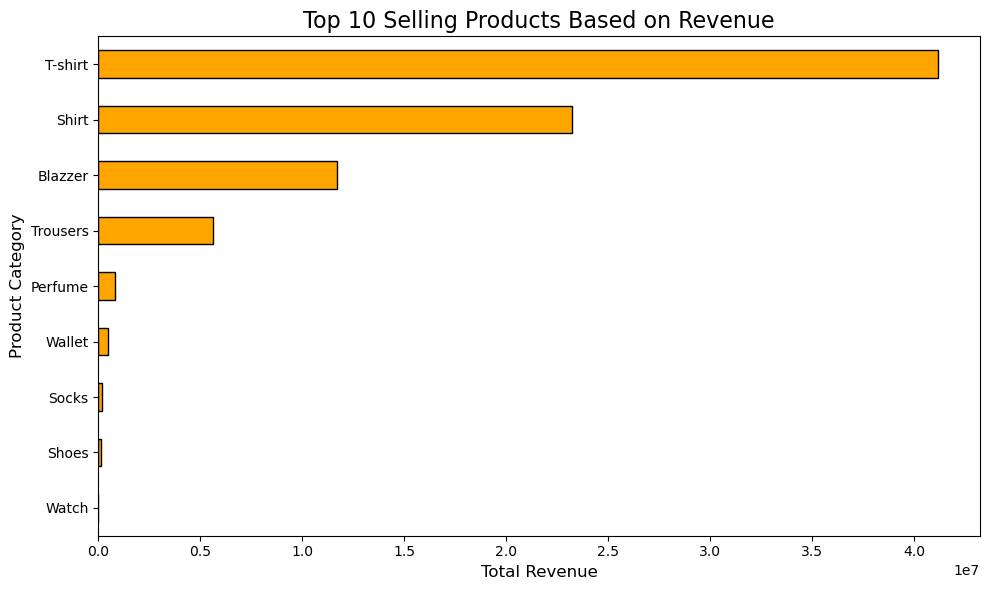

In [185]:
# Aggregate total revenue by 'Category' (or 'Product') and sort the values
top_selling_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=True).head(10)

# Plot the horizontal bar chart for top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 10 Selling Products Based on Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()


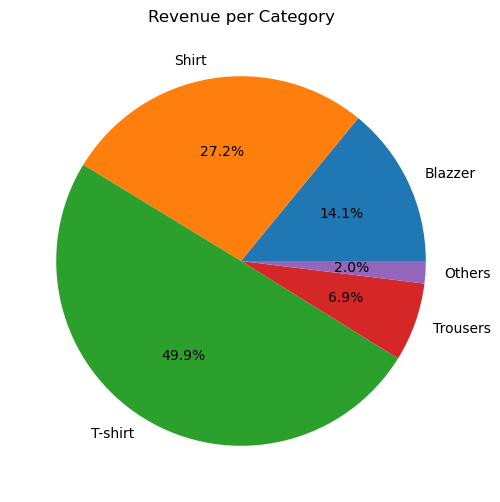

In [46]:
revenue_per_category = df.groupby('Category')['Revenue'].sum()

total_revenue = revenue_per_category.sum()


threshold = 0.05 * total_revenue
small_categories = revenue_per_category[revenue_per_category < threshold]


revenue_per_category = revenue_per_category[revenue_per_category >= threshold]
revenue_per_category['Others'] = small_categories.sum()
plt.figure(figsize=(10, 6))
revenue_per_category.plot.pie(autopct='%1.1f%%')
plt.title('Revenue per Category')
plt.ylabel('')  
plt.show()

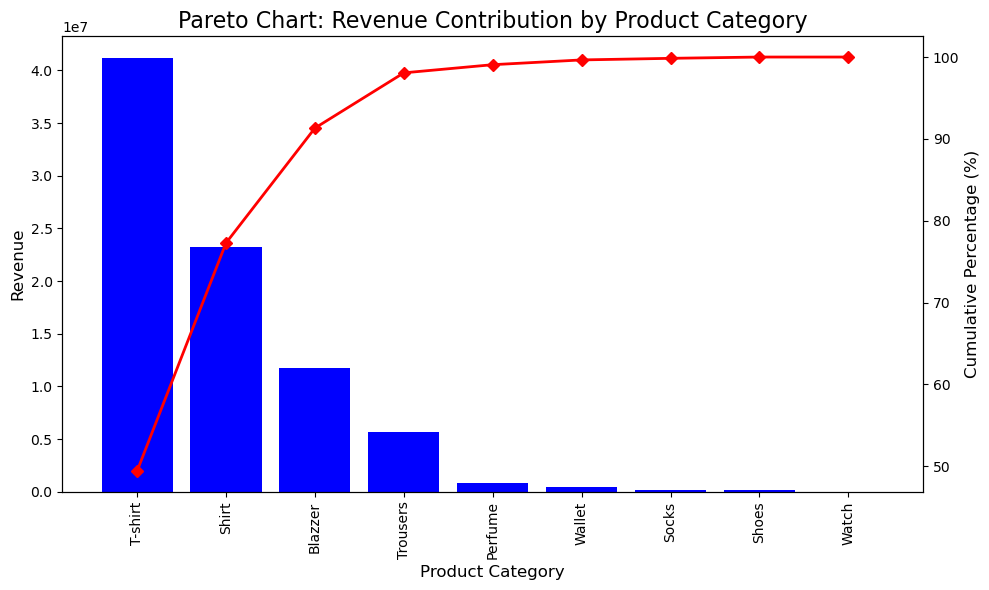

In [186]:
# Aggregate total revenue by product category
revenue_by_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Calculate the cumulative sum of revenue
revenue_by_category_cumsum = revenue_by_category.cumsum()

# Calculate the cumulative percentage of revenue
revenue_by_category_cumsum_percentage = (revenue_by_category_cumsum / revenue_by_category.sum()) * 100

# Plot the Pareto Chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar chart for individual revenue by category
ax1.bar(revenue_by_category.index, revenue_by_category, color='blue', label='Revenue per Category')
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.set_title('Pareto Chart: Revenue Contribution by Product Category', fontsize=16)
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis to plot the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(revenue_by_category.index, revenue_by_category_cumsum_percentage, color='red', marker='D', label='Cumulative %', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)

# Show the plot
fig.tight_layout()
plt.show()


# Fulfillment Analysis

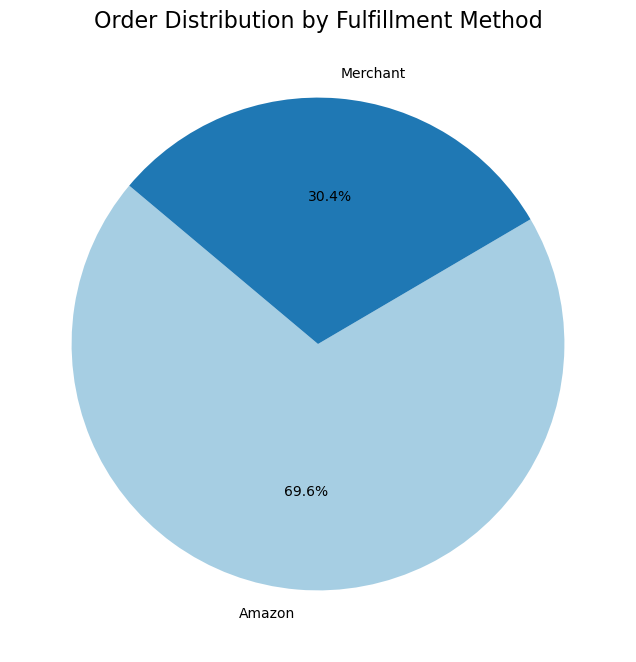

In [188]:
# Calculate the percentage distribution of orders by fulfillment method
order_distribution = df['Fulfilment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
order_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Order Distribution by Fulfillment Method', fontsize=16)
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()


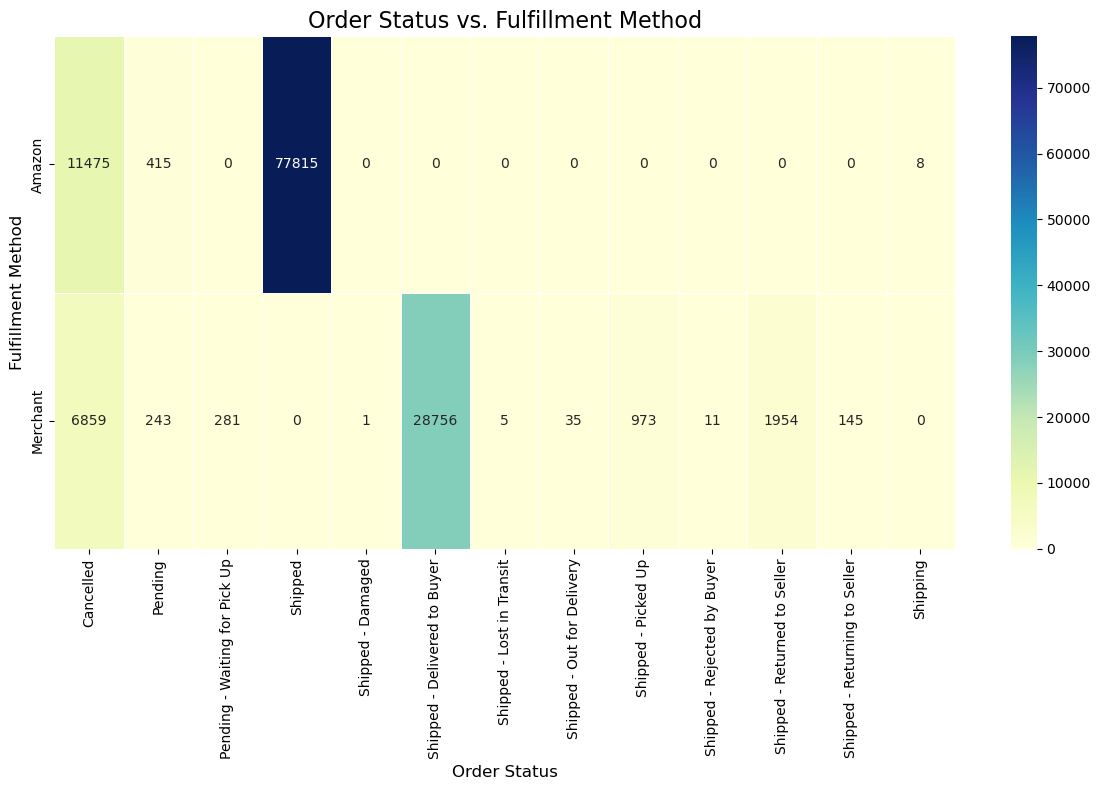

In [190]:
# Create a pivot table for heatmap
heatmap_data = pd.crosstab(df['Fulfilment'], df['Status'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Order Status vs. Fulfillment Method', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Fulfillment Method', fontsize=12)
plt.tight_layout()
plt.show()


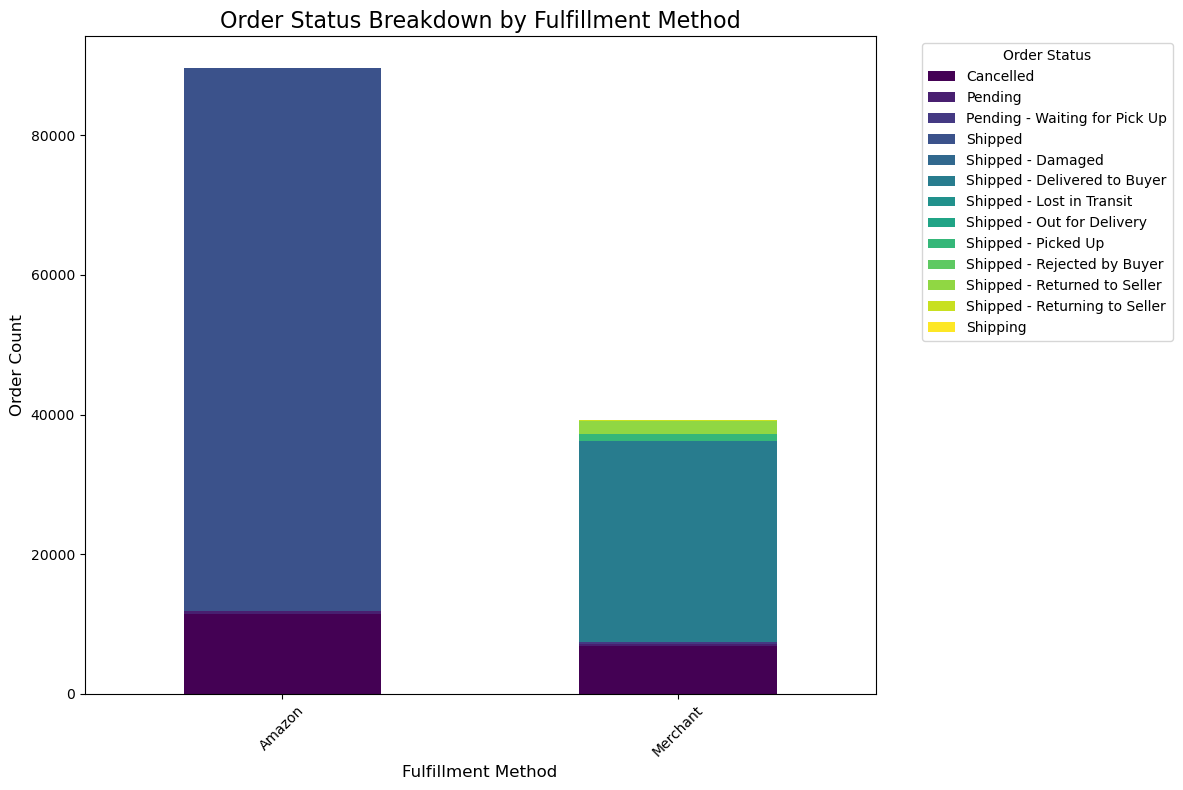

In [191]:
# Calculate status distribution for each fulfillment method
status_distribution = df.groupby(['Fulfilment', 'Status']).size().unstack(fill_value=0)

# Plot stacked bar chart
status_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8), 
    colormap='viridis'
)
plt.title('Order Status Breakdown by Fulfillment Method', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# CUSTOMER SEGMENTATION

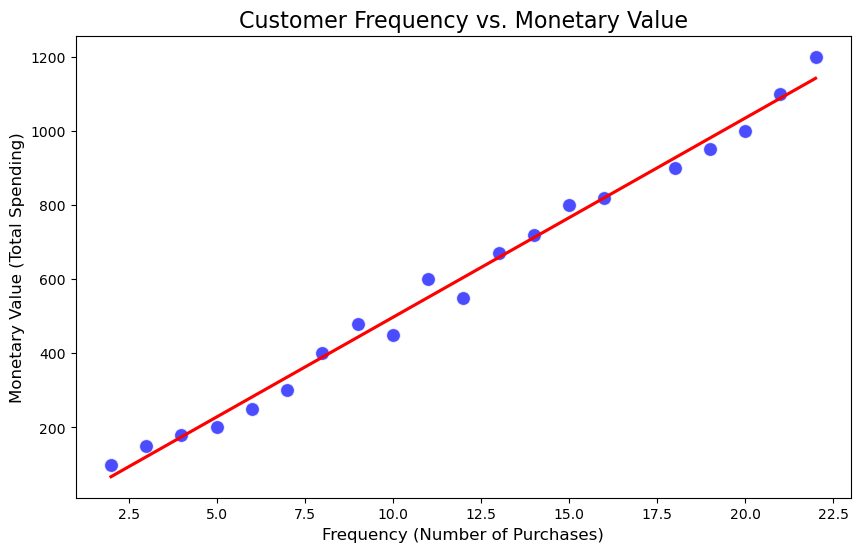

In [74]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Frequency', y='Monetary', color='blue', s=100, alpha=0.7)


sns.regplot(data=data, x='Frequency', y='Monetary', scatter=False, color='red', ci=None)


plt.title("Customer Frequency vs. Monetary Value", fontsize=16)
plt.xlabel("Frequency (Number of Purchases)", fontsize=12)
plt.ylabel("Monetary Value (Total Spending)", fontsize=12)
plt.show()


# days since the last purchase

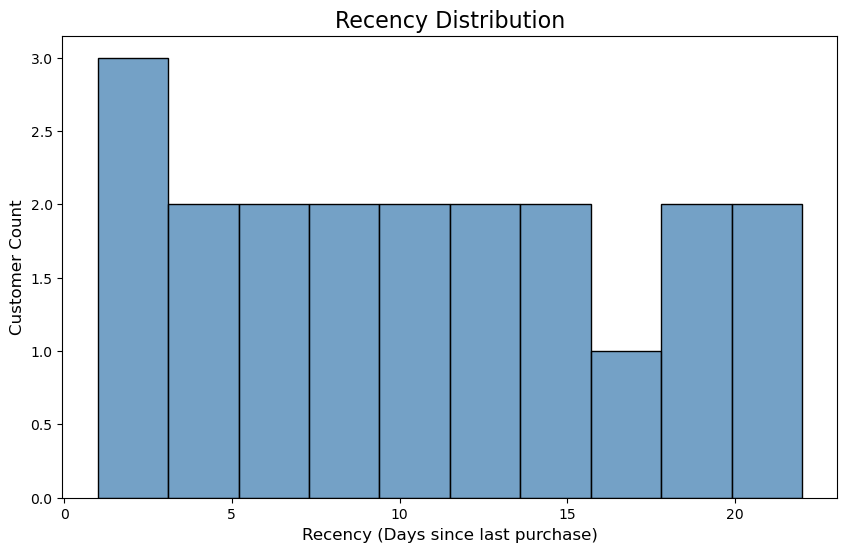

In [75]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Recency'], bins=10, kde=False, color='steelblue')


plt.title("Recency Distribution", fontsize=16)
plt.xlabel("Recency (Days since last purchase)", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.show()


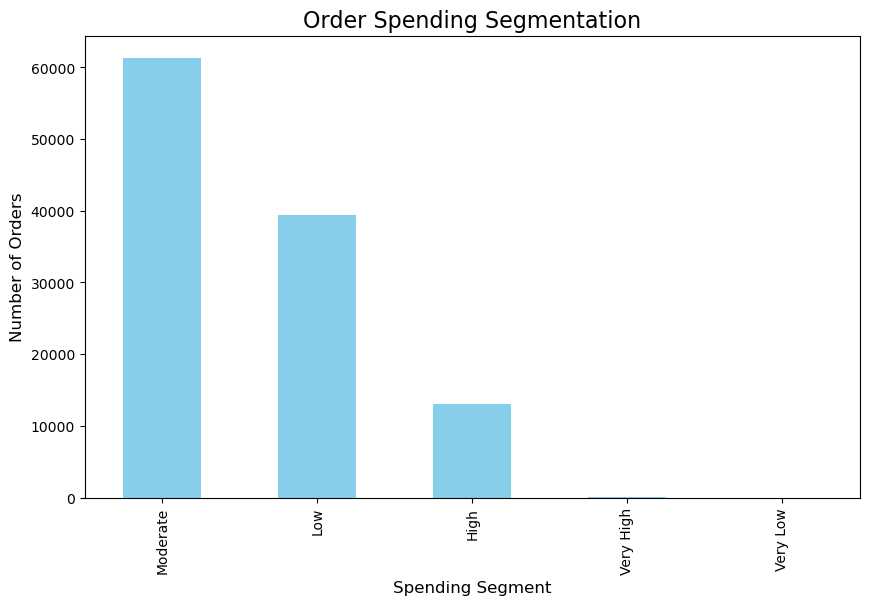

In [45]:

df['spending_segment'] = pd.cut(
    df['total_sales'], 
    bins=[0, 100, 500, 1000, 5000, float('inf')], 
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)


spending_distribution = df['spending_segment'].value_counts()
spending_distribution.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Order Spending Segmentation', fontsize=16)
plt.xlabel('Spending Segment', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()


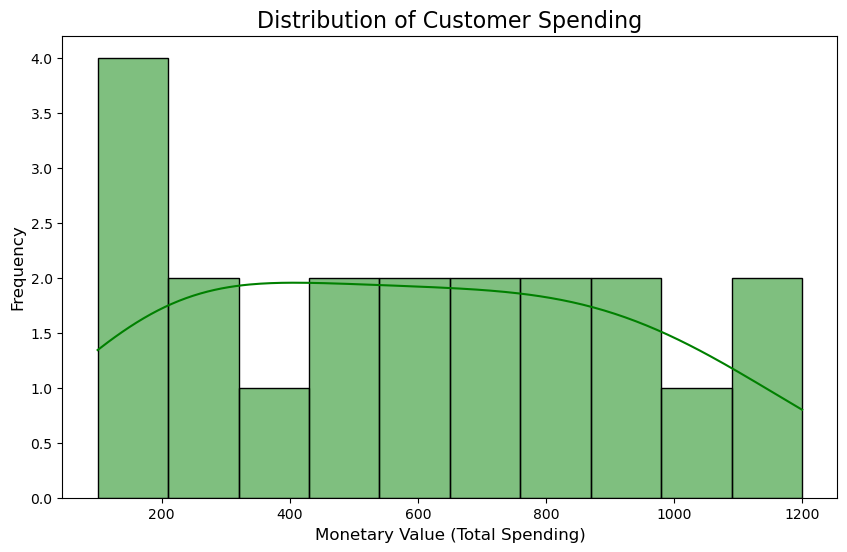

In [76]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Monetary'], bins=10, kde=True, color='green')

plt.title("Distribution of Customer Spending", fontsize=16)
plt.xlabel("Monetary Value (Total Spending)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


# Correlation matrix between the RFM (Recency, Frequency, and Monetary) 

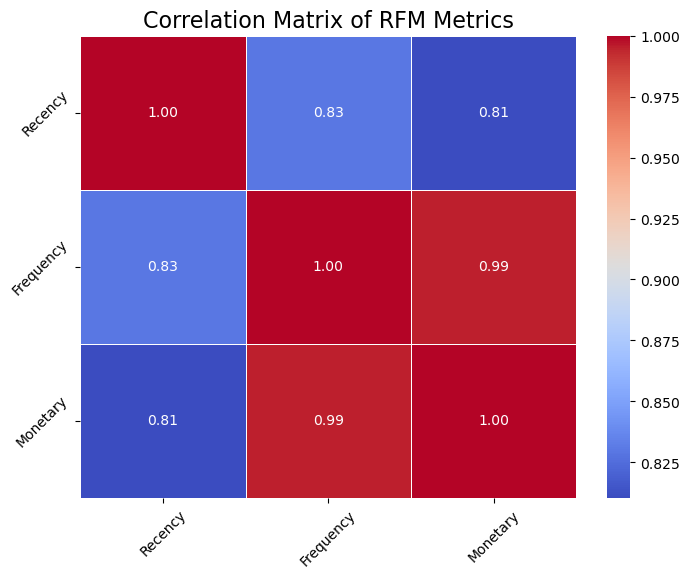

In [77]:

rfm_metrics = data[['Recency', 'Frequency', 'Monetary']]
cor_matrix = rfm_metrics.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title("Correlation Matrix of RFM Metrics", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Geographical Analysis


In [47]:

geo_segmentation = df.groupby('ship-city')[['total_sales', 'Qty']].sum().reset_index()
geo_segmentation['sales_segment'] = pd.cut(
    geo_segmentation['total_sales'], 
    bins=[0, 1000, 5000, 10000, 50000, float('inf')], 
    labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']
)


top_cities = geo_segmentation.sort_values(by='total_sales', ascending=False).head(10)
print(top_cities)


      ship-city  total_sales    Qty sales_segment
775   BENGALURU    6725523.0  10447     Very High
2904  HYDERABAD    4798562.0   7336     Very High
4793     MUMBAI    3590453.0   5649     Very High
5391  NEW DELHI    3494581.0   5248     Very High
1464    CHENNAI    2998981.0   4946     Very High
6156       PUNE    2274957.0   3539     Very High
3710    KOLKATA    1369614.0   2164     Very High
2618   GURUGRAM    1192451.0   1731     Very High
7583      THANE     968869.0   1539     Very High
4395    LUCKNOW     899823.0   1287     Very High


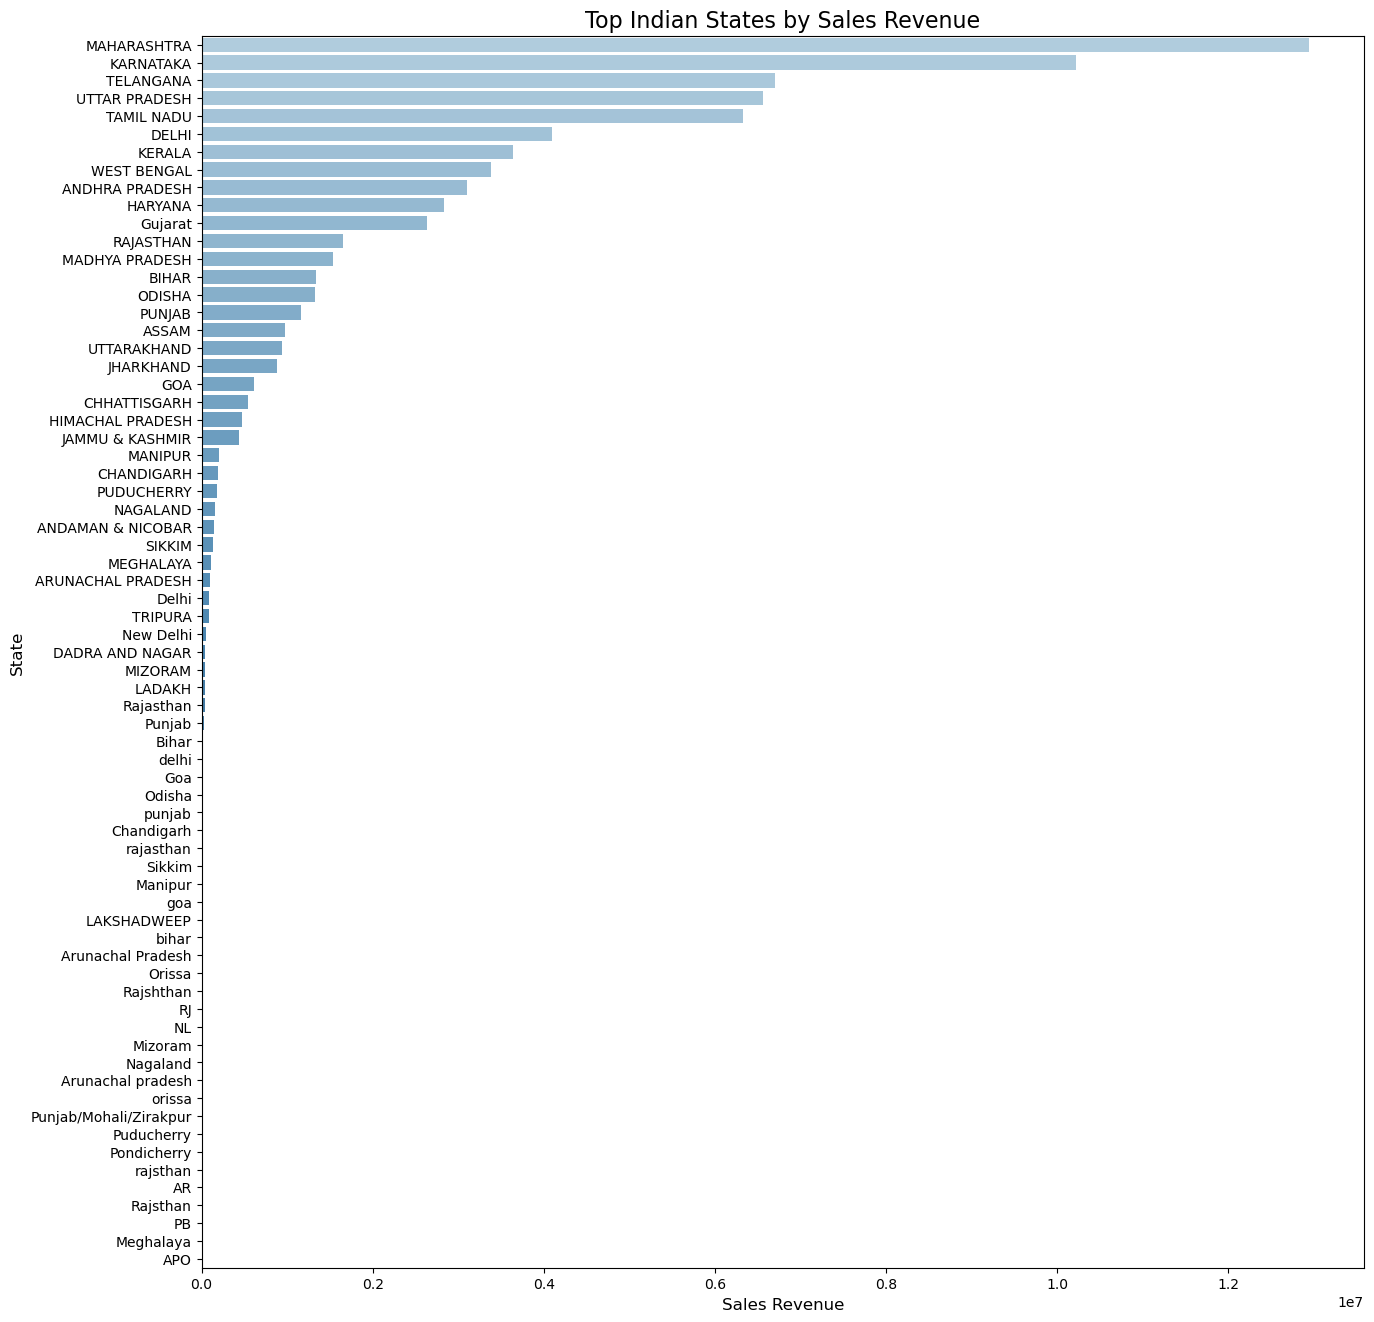

In [81]:


geo_data_india = df.groupby('ship-state')[['total_sales']].sum().reset_index()

geo_data_india.rename(columns={'ship-state': 'State', 'total_sales': 'Sales'}, inplace=True)

geo_data_india_sorted = geo_data_india.sort_values(by='Sales', ascending=False)


plt.figure(figsize=(15, 16))
sns.barplot(data=geo_data_india_sorted, x='Sales', y='State', palette='Blues_d')

plt.title('Top Indian States by Sales Revenue', fontsize=16)
plt.xlabel('Sales Revenue', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.show()


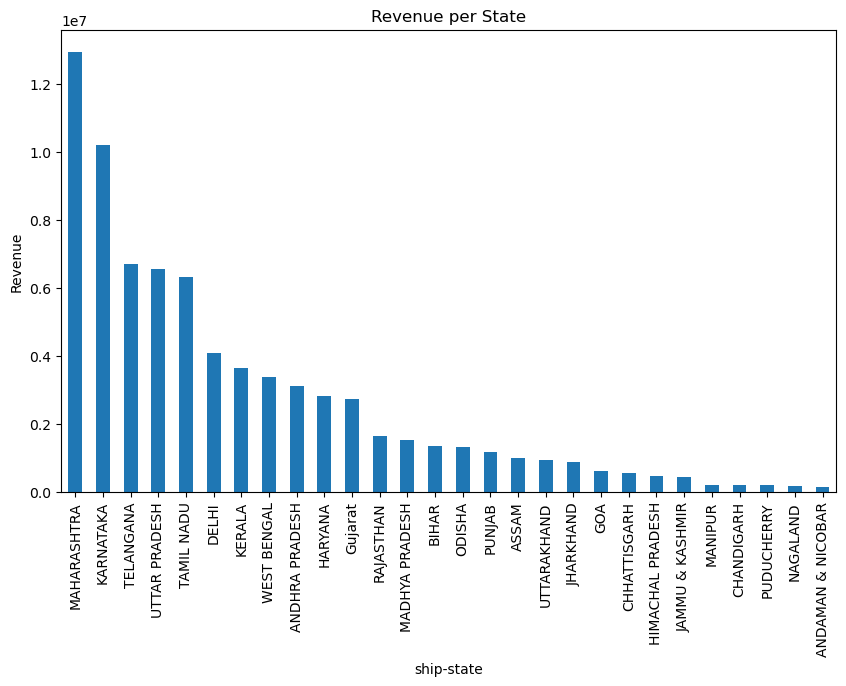

In [49]:

revenue_per_state = df.groupby('ship-state')['Revenue'].sum().sort_values(ascending=False).head(28)


plt.figure(figsize=(10, 6))
revenue_per_state.plot(kind='bar')
plt.title('Revenue per State')
plt.ylabel('Revenue')
plt.show()

In [91]:
# Aggregate sales by city
sales_by_city = df.groupby('ship-city')['Amount'].sum().reset_index()

# Sort the data by sales amount in descending order
sales_by_city = sales_by_city.sort_values(by='Amount', ascending=False)

# Display the top few rows of aggregated data
sales_by_city.head()


,ship-city,Amount
775,BENGALURU,6845390.65
2904,HYDERABAD,4946394.25
4793,MUMBAI,3701843.04
5391,NEW DELHI,3612512.78
1464,CHENNAI,3103415.74


In [93]:
# Aggregating sales by state
sales_by_state = df.groupby('ship-state')['Amount'].sum().reset_index()

# Sort the sales by amount in descending order (optional)
sales_by_state = sales_by_state.sort_values(by='Amount', ascending=False)

# Display the first few rows to ensure it has been aggregated correctly
sales_by_state.head()


,ship-state,Amount
28,MAHARASHTRA,13340333.05
23,KARNATAKA,10480694.22
57,TELANGANA,6915018.08
59,UTTAR PRADESH,6823947.08
56,TAMIL NADU,6519182.30


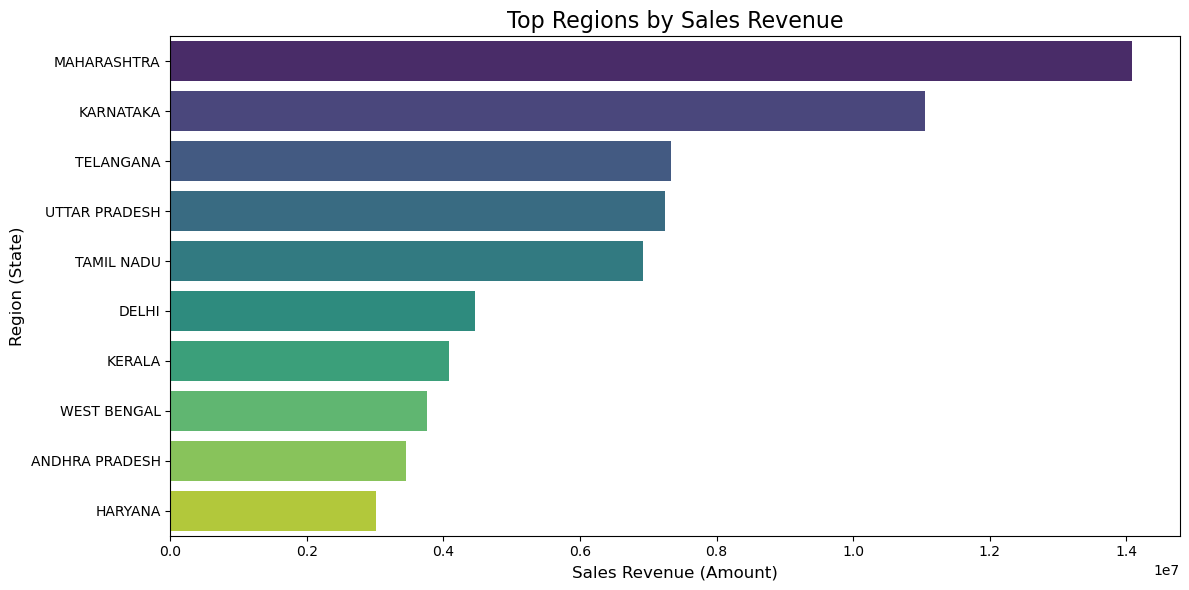

In [125]:
# Step 1: Aggregate sales data by region
top_regions = df.groupby('ship-state')['Amount'].sum().reset_index()

# Step 2: Sort by sales/revenue
top_regions = top_regions.sort_values(by='Amount', ascending=False)

# Step 3: Select top N regions (e.g., top 10)
top_regions = top_regions.head(10)

# Step 4: Create the bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='ship-state', data=top_regions, palette='viridis')

# Add titles and labels
plt.title("Top Regions by Sales Revenue", fontsize=16)
plt.xlabel("Sales Revenue (Amount)", fontsize=12)
plt.ylabel("Region (State)", fontsize=12)
plt.tight_layout()

# Show the chart
plt.show()


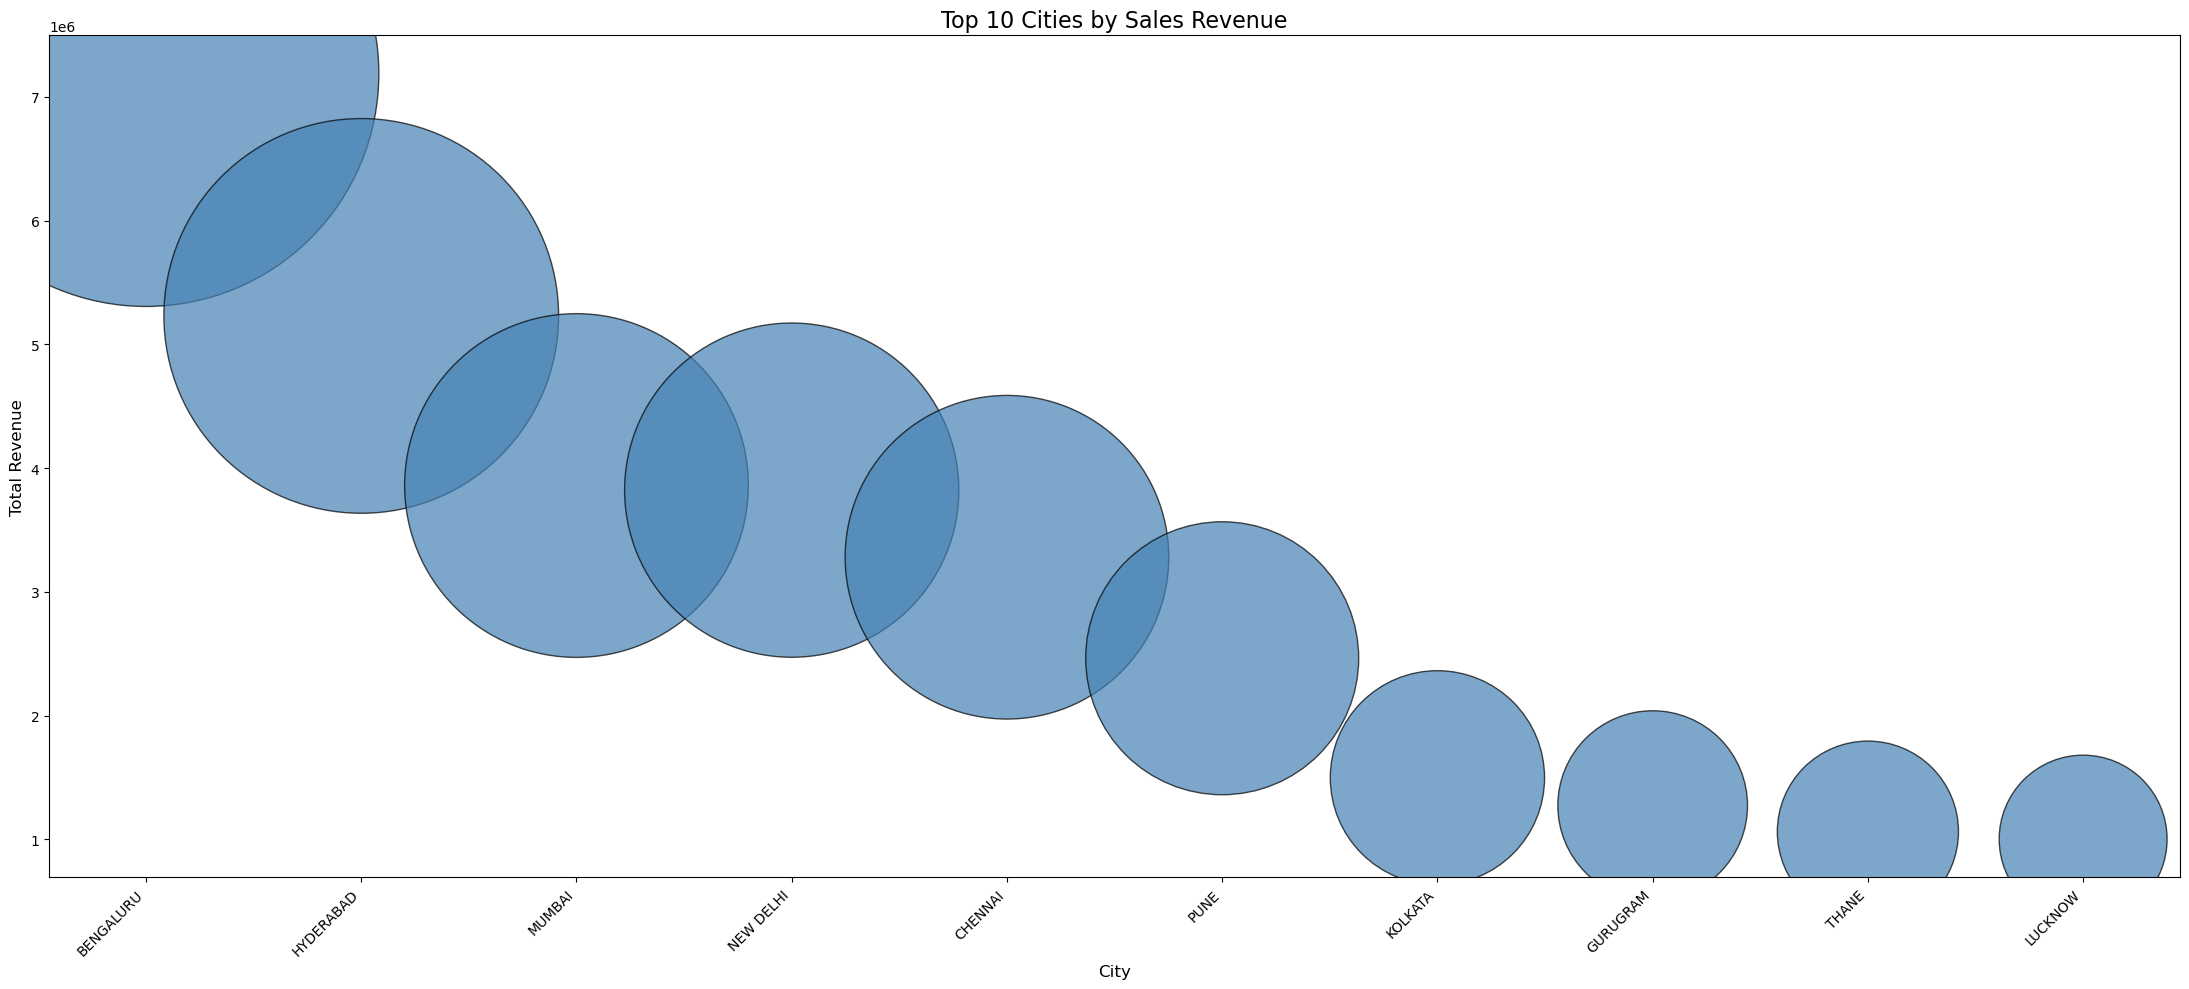

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Aggregate data to calculate total sales and order count per city
city_sales = df.groupby('ship-city').agg(
    TotalRevenue=('Amount', 'sum'),
    OrderCount=('Order ID', 'count')
).reset_index()

# Step 2: Filter the top 10 cities by total revenue
top_10_cities = city_sales.sort_values(by='TotalRevenue', ascending=False).head(10)

# Step 3: Create a bubble chart for the top 10 cities
plt.figure(figsize=(22, 10))

# Bubble chart: City on x-axis, Revenue on y-axis, Bubble size by Order Count
plt.scatter(
    top_10_cities['ship-city'],
    top_10_cities['TotalRevenue'],
    s=top_10_cities['OrderCount'] * 10,  # Scale the bubble sizes
    alpha=0.7,
    color='steelblue',
    edgecolor='black'
)

# Adding titles and labels
plt.title("Top 10 Cities by Sales Revenue", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


# Additional Business Insights

In [145]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill or drop missing values as appropriate
df['Amount'] = df['Amount'].fillna(0)  # Assuming missing Amount means no revenue
df['ship-city'] = df['ship-city'].fillna('Unknown')  # Fill missing city with 'Unknown'
df['ship-state'] = df['ship-state'].fillna('Unknown')  # Fill missing state with 'Unknown'


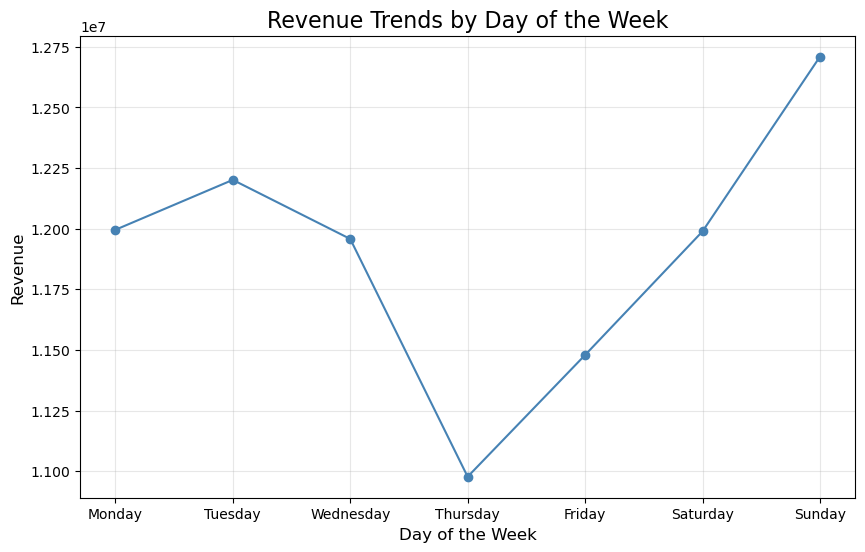

In [146]:
# Extract day of the week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['Date'].dt.day_name()

# Aggregate revenue by day of the week
revenue_by_day = df.groupby('DayOfWeek')['Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the line chart for revenue by day of the week
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_day.index, revenue_by_day.values, marker='o', color='steelblue', linestyle='-')
plt.title("Revenue Trends by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [161]:
# Check if the 'DayOfWeek' column exists
print(df.columns)

# If 'DayOfWeek' does not exist, you can create it from the 'Date' column:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure the Date column is in datetime format
df['DayOfWeek'] = df['Date'].dt.day_name()  # Extract day name (e.g., 'Monday', 'Tuesday', etc.)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'New', 'PendingS', 'DayOfWeek', 'DayType'],
      dtype='object')


In [162]:
# Classify days into 'Weekday' or 'Weekend'
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Check the new columns
print(df[['DayOfWeek', 'DayType']].head())


  DayOfWeek  DayType
0  Saturday  Weekend
1  Saturday  Weekend
2  Saturday  Weekend
3  Saturday  Weekend
4  Saturday  Weekend


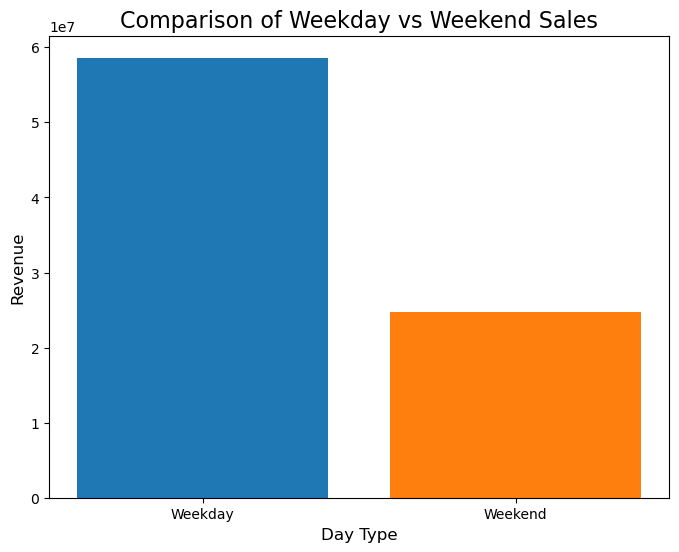

In [163]:
# Aggregate revenue by DayType (Weekday vs Weekend)
revenue_by_daytype = df.groupby('DayType')['Amount'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(revenue_by_daytype.index, revenue_by_daytype.values, color=['#1f77b4', '#ff7f0e'])
plt.title("Comparison of Weekday vs Weekend Sales", fontsize=16)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=0)
plt.show()


In [164]:

# Assuming 'Order ID' corresponds to customer activity, we will use it to create a proxy.
df['OrderCount'] = df.groupby('Order ID')['Order ID'].transform('count')

# Define if a customer is returning (more than one order)
df['is_returning_customer'] = df['OrderCount'] > 1

# Check the first few rows
print(df[['Order ID', 'is_returning_customer']].head())


              Order ID  is_returning_customer
0  405-8078784-5731545                  False
1  171-9198151-1101146                  False
2  404-0687676-7273146                  False
3  403-9615377-8133951                  False
4  407-1069790-7240320                  False


In [165]:
# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set the time period for aggregation (e.g., by month)
df['Month'] = df['Date'].dt.to_period('M')

# Calculate the total number of unique customers (based on 'Order ID') per month
total_customers_per_month = df.groupby('Month')['Order ID'].nunique()

# Calculate the number of returning customers per month (based on the 'is_returning_customer' flag)
returning_customers_per_month = df[df['is_returning_customer']].groupby('Month')['Order ID'].nunique()

# Calculate the percentage of returning customers per month
percentage_returning_customers = (returning_customers_per_month / total_customers_per_month) * 100

# Show the result
print(percentage_returning_customers.head())


Month
2022-03    6.329114
2022-04    5.911308
2022-05    5.716325
2022-06    5.788111
Freq: M, Name: Order ID, dtype: float64


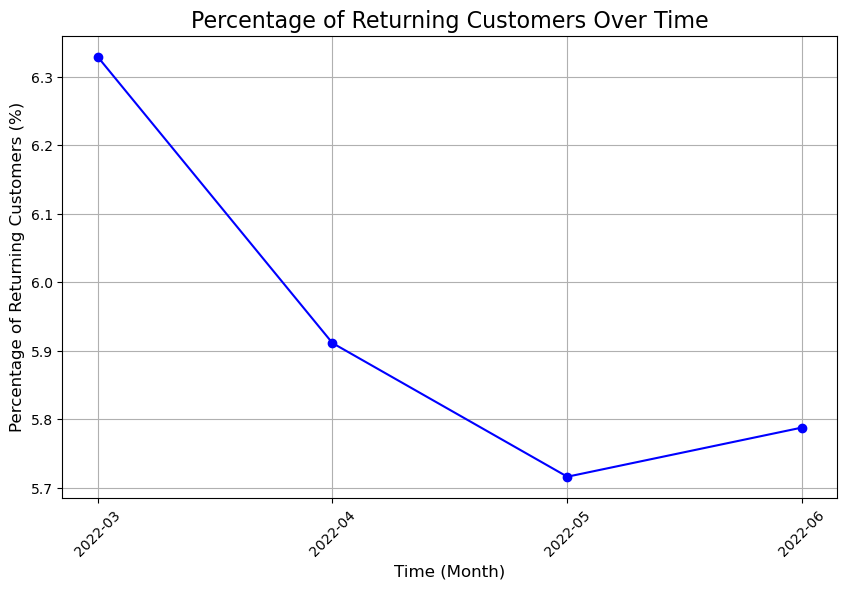

In [166]:
import matplotlib.pyplot as plt

# Plot the line chart for percentage of returning customers over time
plt.figure(figsize=(10, 6))
plt.plot(percentage_returning_customers.index.astype(str), percentage_returning_customers.values, marker='o', color='b')

plt.title("Percentage of Returning Customers Over Time", fontsize=16)
plt.xlabel("Time (Month)", fontsize=12)
plt.ylabel("Percentage of Returning Customers (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [198]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  128976 non-null  int64         
 1   Order ID               128976 non-null  object        
 2   Date                   128976 non-null  datetime64[ns]
 3   Status                 128976 non-null  object        
 4   Fulfilment             128976 non-null  object        
 5   Sales Channel          128976 non-null  object        
 6   ship-service-level     128976 non-null  object        
 7   Category               128976 non-null  object        
 8   Size                   128976 non-null  object        
 9   Courier Status         128976 non-null  object        
 10  Qty                    128976 non-null  int64         
 11  currency               121176 non-null  object        
 12  Amount                 128976 non-null  floa

In [199]:
df.to_csv('final_data.csv', index=False)

print("File saved as 'final_data.csv'.")


File saved as 'final_data.csv'.


In [200]:
df.to_csv(r'C:\Users\KIIT\OneDrive\Desktop\vs codeings\.vscode\amazon\final_data.csv', index=False)
